In [40]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import pandas as pd

df = pd.read_csv('life_expectancy.csv')

In [43]:
data_arr = np.array(df.iloc[:]).T[3:-1].T.astype(np.float64)

In [44]:
new_data_arr = []
for data in data_arr:
  if np.sum(data) == np.sum(data):
    new_data_arr.append(data)

new_data_arr = np.array(new_data_arr)

In [45]:
new_data_arr_norm = new_data_arr / np.mean(new_data_arr, axis = 0)
p = np.random.permutation(len(new_data_arr_norm))
new_data_arr_norm = new_data_arr_norm[p]

In [46]:
tr_data = new_data_arr_norm[0:1200]
ts_data = new_data_arr_norm[1200:]

print(np.mean(tr_data))

0.992462967607096


In [47]:
tr_data_x = torch.from_numpy(tr_data.T[1:-1].T.astype(np.float32))
tr_data_y = torch.from_numpy(np.expand_dims(tr_data.T[0].T, axis = -1).astype(np.float32))

ts_data_x = torch.from_numpy(ts_data.T[1:-1].T.astype(np.float32))
ts_data_y = torch.from_numpy(np.expand_dims(ts_data.T[0].T, axis = -1).astype(np.float32))

In [48]:
model = nn.Sequential(
    nn.Linear(in_features=16, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=1),
)

In [49]:
mse_loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [50]:
cost_arr = []
for step in range(400):
    pre = model(tr_data_x)
    mse = mse_loss(pre, tr_data_y)
    cost = mse
    cost_arr.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

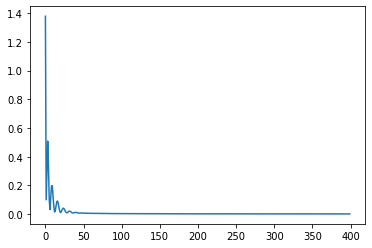

In [51]:
plt.plot(cost_arr)

In [52]:
np.sum((((model(ts_data_x)-ts_data_y)*69.3).detach().numpy())**2)/len(ts_data_y)

8.778581309159243

In [53]:
np.std(ts_data_y.detach().numpy()*69.3)

8.417166

In [54]:
((model(ts_data_x)-ts_data_y)*69.3)

tensor([[ 1.2319e+00],
        [-1.4246e+00],
        [-1.7000e+00],
        [ 2.4498e+00],
        [-6.2097e+00],
        [-3.6594e+00],
        [-2.3226e-01],
        [ 5.4640e+00],
        [ 1.0971e+00],
        [ 9.3484e-02],
        [ 5.2186e-02],
        [-2.4503e+00],
        [ 2.4939e+00],
        [ 2.2280e-02],
        [ 1.0888e+00],
        [-2.1899e+00],
        [-5.5631e+00],
        [-1.2635e+00],
        [ 3.2168e+00],
        [ 1.5948e+00],
        [-2.0614e+00],
        [ 3.1192e+00],
        [-7.8470e+00],
        [ 1.9004e+00],
        [ 9.5688e-01],
        [-2.0952e-01],
        [-2.2976e+00],
        [-1.6303e+00],
        [ 1.6344e+00],
        [ 1.5522e-01],
        [-1.4937e+00],
        [ 1.3671e+00],
        [-1.8967e+00],
        [ 6.8917e+00],
        [-6.1557e-01],
        [-4.7995e+00],
        [ 2.5463e+00],
        [-3.3393e+00],
        [-8.8077e+00],
        [-3.7580e+00],
        [ 2.4086e-01],
        [-2.8138e+00],
        [ 3.9154e+00],
        [-2

In [55]:
np.mean(new_data_arr, axis = 0)[0]

69.30230442692543

-0.0024698568


(array([  1.,   3.,   8.,  25.,  74., 135., 133.,  47.,  17.,   6.]),
 array([-0.1845671 , -0.1531347 , -0.1217023 , -0.09026991, -0.05883751,
        -0.02740511,  0.00402728,  0.03545968,  0.06689207,  0.09832447,
         0.12975687], dtype=float32),
 <BarContainer object of 10 artists>)

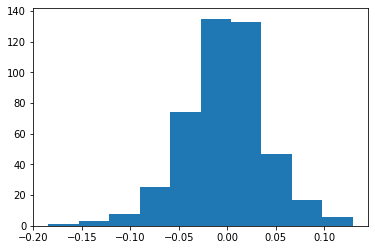

In [60]:
acc=((model(ts_data_x)-ts_data_y))
#print(acc)
acc=acc.detach().numpy()
print(np.mean(acc))
plt.hist(acc)

Sunum
Ali

1.   Paper ne yapıyor? (2-3 slide)
2.   Bizim dataset ne? (2 slide)
3.   Hangi modelleri kullanıyoruz (1 Slide)
4.   NN (Niye NN basit, BNN ile karşılaştırmak için, makalede öyle olduğu için) (1-2 Slide) 


Ata
5.  BNN (Makalede o şekilde. Variational Inference Anlatılacak) (2-3 Slide)
6.  Fourier Analysis (Feature selection gibi) (1 slide)
7.  Results-Comparison, why BNN is better? (3-4 Slide)
8.  Most Relevant feature (1-2 slide)

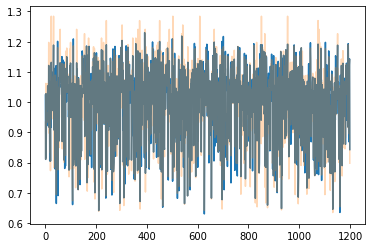

In [63]:
trrx=model(tr_data_x).detach().numpy()
trry=tr_data_y.detach().numpy()

plt.plot(trrx)
plt.plot(trry,alpha=0.3)